# Image Stitching (Using BF-matcher with KNN based matching procedure & RANSAC to estimate homography )

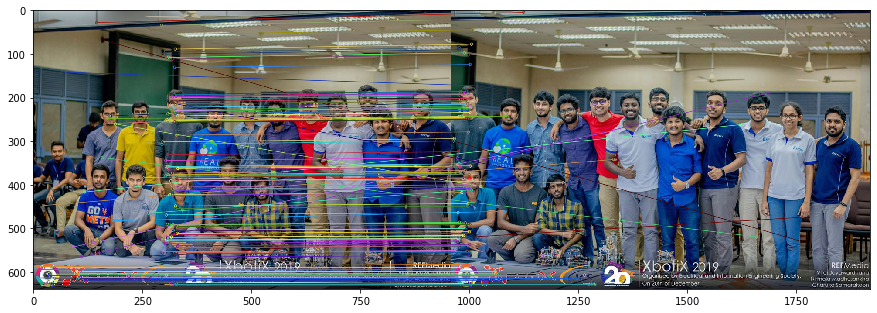

[[ 1.06589085e+00 -1.48396793e-02 -3.05446914e+02]
 [ 3.15251568e-02  1.04713615e+00 -2.42180981e+01]
 [ 5.82036940e-05  1.58636614e-05  1.00000000e+00]]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import string

im1 = cv.imread('/Users/sahangurusinghe/Downloads/80803211_2304249466531654_118691730462605312_o.jpg', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('/Users/sahangurusinghe/Downloads/80392021_2304249166531684_464336993204043776_o.jpg', cv.IMREAD_ANYCOLOR)
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

im1Gray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2Gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im1Gray,None)
kp2, des2 = sift.detectAndCompute(im2Gray,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good1 = []
good2 = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good1.append([m])
        good2.append(m)

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(im1,kp1,im2,kp2,good1[:150],None,flags=2)
plt.figure(figsize=(15,10))
plt.imshow(img3)
plt.show()


points1 = np.float32([ kp1[m.queryIdx].pt for m in good2 ]).reshape(-1,1,2)
points2 = np.float32([ kp2[m.trainIdx].pt for m in good2 ]).reshape(-1,1,2)
h, mask = cv.findHomography(points1, points2, cv.RANSAC)
print(h)


im2_warped = cv.warpPerspective(im2, np.linalg.inv(h), (1250,650))
im2_warped[0:im1.shape[0], 0:im1.shape[1]] = im1


# Final Stitched Image

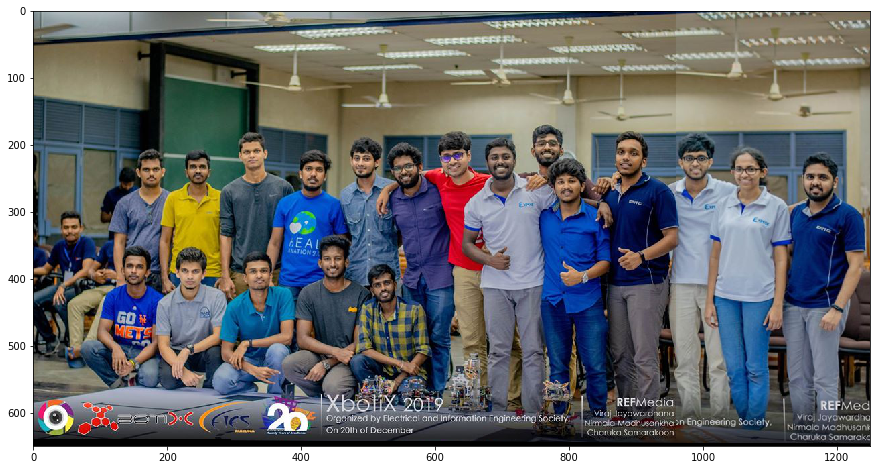

(<matplotlib.image.AxesImage at 0x10fc6bed0>, None)

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(im2_warped),plt.show()

# Image Stitching (Using BF-matcher with using the single best match & RANSAC to estimate homography )

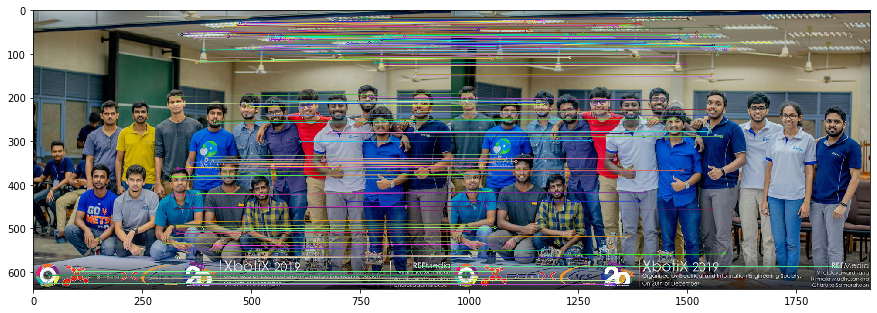

[[ 1.05315584e+00 -1.77960714e-02 -2.98620905e+02]
 [ 2.90278308e-02  1.03837981e+00 -2.21111106e+01]
 [ 5.04685603e-05  1.00397411e-05  1.00000000e+00]]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import string

im1 = cv.imread('/Users/sahangurusinghe/Downloads/80803211_2304249466531654_118691730462605312_o.jpg', cv.IMREAD_ANYCOLOR)
im2 = cv.imread('/Users/sahangurusinghe/Downloads/80392021_2304249166531684_464336993204043776_o.jpg', cv.IMREAD_ANYCOLOR)
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

im1Gray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
im2Gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im1Gray,None)
kp2, des2 = sift.detectAndCompute(im2Gray,None)

# BFMatcher with default params
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)

# cv2.drawMatches expects list of lists as matches.
img3 = cv.drawMatches(im1,kp1,im2,kp2,matches[:250],None, flags=2)
plt.figure(figsize=(15,10))
plt.imshow(img3),plt.show()


points1 = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
points2 = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
h, mask = cv.findHomography(points1, points2, cv.RANSAC)
print(h)


im2_warped = cv.warpPerspective(im2, np.linalg.inv(h), (1250,650))
im2_warped[0:im1.shape[0], 0:im1.shape[1]] = im1


# Final Stitched Image

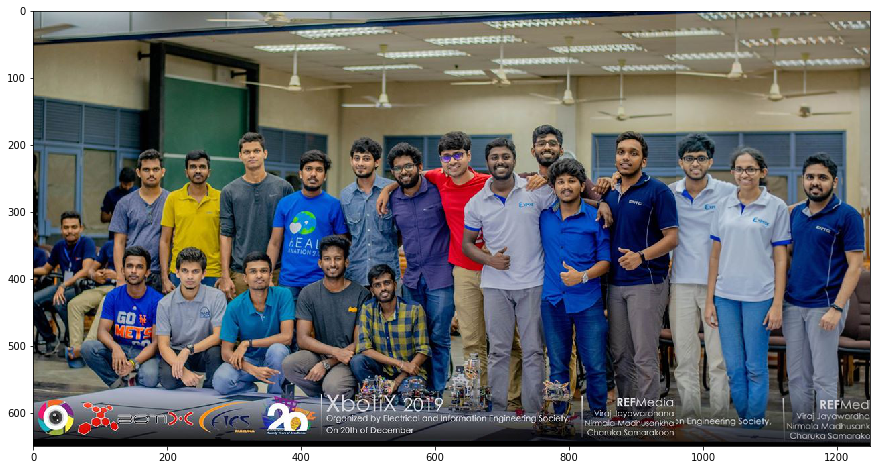

(<matplotlib.image.AxesImage at 0x10ee6e390>, None)

In [5]:
plt.figure(figsize=(15,10))
plt.imshow(im2_warped),plt.show()

# Orignal Images

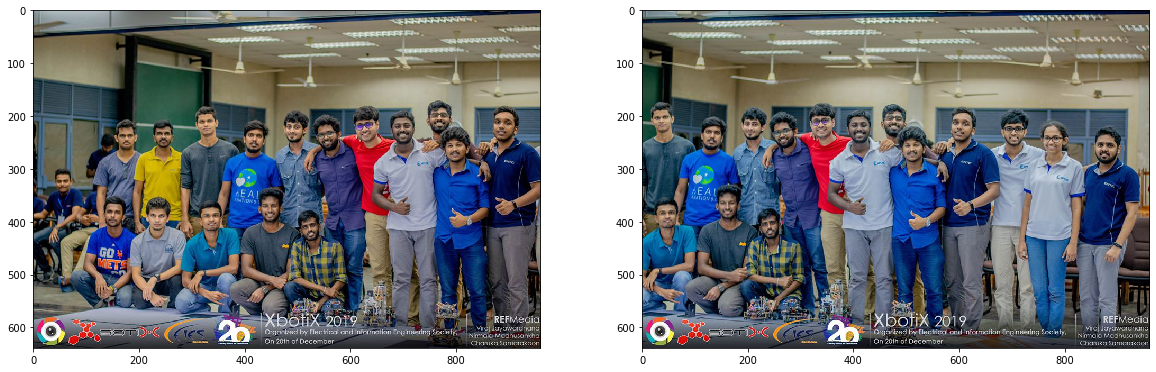

In [6]:
 plt.figure(figsize=(20,15))
 plt.subplot(121)
 plt.imshow(im1)

 plt.subplot(122)
 plt.imshow(im2)
 plt.show()

